#**Loan Prediction**

----
----

##Import Libraries

In [102]:
import pandas as pd
import numpy as np
from numpy import math

from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt


##Import Datasets

In [103]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


In [104]:
train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

## Pre - Processing Data

In [106]:
train.isnull().sum() #checking for null data

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [107]:
print(train.duplicated().sum())
train.drop_duplicates(inplace=True) #Droping the dupliments

0


In [108]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [109]:
train.columns=train.columns.str.lower()
train.columns=train.columns.str.replace(" ","_")

##Grahical Representation


<Axes: ylabel='Frequency'>

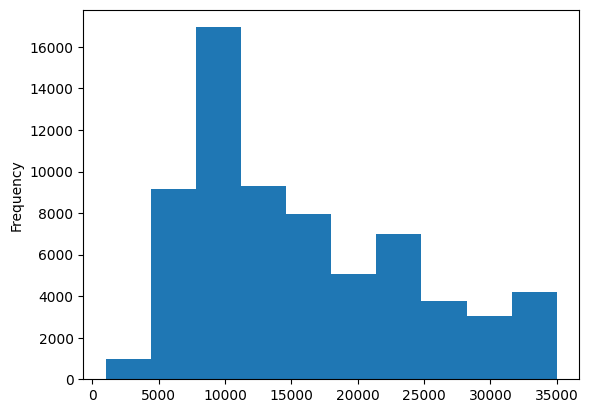

In [110]:
train['funded_amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

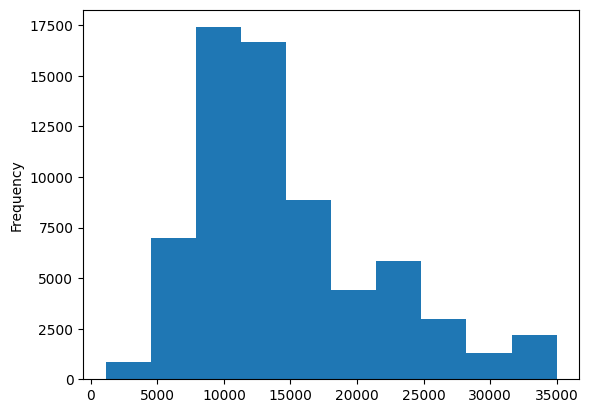

In [111]:
train['funded_amount_investor'].plot(kind='hist')

In [112]:
train['term'].unique()

array([59, 36, 58])

In [113]:
train=train.fillna(0)

In [114]:
train['term']=train['term'].astype("str")

In [115]:

train.drop(['loan_title','batch_enrolled','sub_grade','payment_plan','id'],axis=1,inplace=True)

In [116]:
train.select_dtypes(include='object').columns


Index(['term', 'grade', 'employment_duration', 'verification_status',
       'initial_list_status', 'application_type'],
      dtype='object')

In [117]:
train=pd.get_dummies(train,columns=['term', 'grade', 'employment_duration', 'verification_status',
       'initial_list_status', 'application_type'],drop_first=True)

In [118]:
train

,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,...,grade_D,grade_E,grade_F,grade_G,employment_duration_OWN,employment_duration_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_JOINT
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,0,13,0,...,0,0,0,0,0,0,0,0,1,0
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,0,12,0,...,0,0,0,0,0,1,1,0,0,0
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,0,14,0,...,0,0,1,0,0,0,1,0,1,0
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,0,7,0,...,0,0,0,0,0,0,1,0,1,0
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,3,13,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,9.408858,83961.15003,28.105127,1,0,13,0,...,0,0,0,0,0,0,0,1,1,0
67459,8323,11046,15637.46301,9.972104,65491.12817,17.694279,0,0,12,0,...,0,0,0,0,0,1,1,0,1,0
67460,15897,32921,12329.45775,19.650943,34813.96985,10.295774,0,0,7,1,...,0,0,0,0,0,0,0,1,1,0
67461,16567,4975,21353.68465,13.169095,96938.83564,7.614624,0,0,14,0,...,1,0,0,0,1,0,0,0,0,0


In [119]:
# Select the relevant features and target variable
features = train.drop(columns=["loan_status"])
target = train["loan_status"]

# Store the feature names
feature_names = features.columns.tolist()

In [120]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [121]:
x


,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,...,grade_F,grade_G,employment_duration_OWN,employment_duration_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,0,13,0,...,0,0,0,0,0,0,0,1,1,0
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,0,12,0,...,0,0,0,1,1,0,1,0,1,0
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,0,14,0,...,1,0,0,0,1,0,0,1,1,0
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,0,7,0,...,0,0,0,0,1,0,0,1,1,0
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,3,13,1,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36780,6536,32264,12545.86057,16.025877,48495.14233,13.542158,0,0,21,0,...,0,0,0,0,1,0,1,0,1,0
36781,17887,16907,12209.48706,12.622398,69059.30417,10.629099,0,1,10,0,...,0,0,0,0,1,0,1,0,1,0
36782,15322,20468,10706.46041,6.324249,200598.39730,22.284869,0,0,35,0,...,1,0,0,0,1,0,1,0,1,0
36783,11038,8418,10151.47047,12.619130,64452.15117,33.151261,0,1,15,0,...,0,0,0,1,0,1,0,1,1,0


### Split the data into features and labels

In [122]:
#slipting into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(27588, 39)
(27588,)
(9197, 39)
(9197,)


## Logistic Regression


In [123]:
#Applying logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)

#predicting the Results
y_pred = model.predict(x_test)

#Confusion matrix
confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))




Accuracy of the model is 90.61


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Support Vector Machine

In [132]:
# Support Vector Machine classification
svm_model = SVC()

svm_model.fit(x_train,y_train)

svm_y_pred = svm_model.predict(x_test)

svm_cm = confusion_matrix(y_test, svm_y_pred)

accuracy=accuracy_score(y_test, svm_y_pred)*100
print("Accuracy of the model is {:.2f} %".format(accuracy))


Accuracy of the model is 90.61 %


## Random Forest

In [133]:
# Random Forest classification
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

rf_y_pred = rf_model.predict(x_test)

# Compute the confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)

accuracy=accuracy_score(y_test, rf_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 90.58
